# Forest Cover Type - Outlier detection
## Local outlier factor

In [1]:
import numpy as np
import scipy.spatial.distance as distance
from skimage import io
from sklearn.neighbors import LocalOutlierFactor
import warnings

warnings.filterwarnings("ignore")

%run ../util/load_data.py
%run ../util/data_visualization.py

##### Load data

In [2]:
data = load_data("../../Data")
train_data = data['train_data']
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,5,9,1
1,2,2590,56,2,212,-6,390,220,235,151,6225,5,9,1
2,3,2804,139,9,268,65,3180,234,238,135,6121,2,2,1
3,4,2785,155,18,242,118,3090,238,238,122,6211,2,0,1
4,5,2595,45,2,153,-1,391,220,234,150,6172,5,9,1


##### Extract numerical columns

In [3]:
train_data = train_data[data['numerical_attributes']]
train_data.head()

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology
0,51,2596,148,221,232,6279,258,510,3,0
1,56,2590,151,220,235,6225,212,390,2,-6
2,139,2804,135,234,238,6121,268,3180,9,65
3,155,2785,122,238,238,6211,242,3090,18,118
4,45,2595,150,220,234,6172,153,391,2,-1


##### Fit Local Outlier Factor

In [4]:
classifier = LocalOutlierFactor(n_neighbors=10)
y_pred = classifier.fit_predict(train_data)
outliers_ids = np.argwhere(y_pred == -1).tolist()

# Visualization

##### Create new array of colors with outlier

In [ ]:
copy_train_data = data['train_data'][data['numerical_attributes'] + data['target'] + ['Id']].copy()
color = [row[data['target'][0]] if row['Id'] not in outliers_ids else -10 for index,row in copy_train_data.iterrows()]

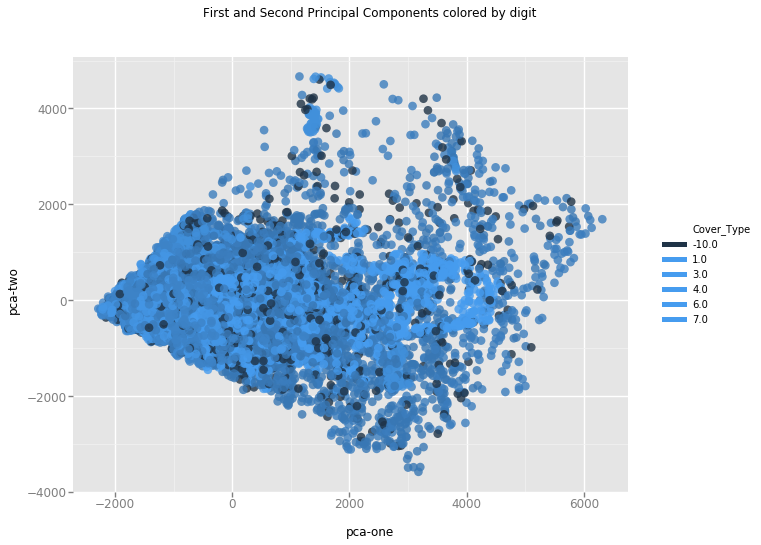

<ggplot: (-9223371898008269694)>

In [ ]:
pca_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0], color)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15120 samples in 0.015s...
[t-SNE] Computed neighbors for 15120 samples in 1.005s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15120
[t-SNE] Computed conditional probabilities for sample 2000 / 15120
[t-SNE] Computed conditional probabilities for sample 3000 / 15120
[t-SNE] Computed conditional probabilities for sample 4000 / 15120
[t-SNE] Computed conditional probabilities for sample 5000 / 15120
[t-SNE] Computed conditional probabilities for sample 6000 / 15120
[t-SNE] Computed conditional probabilities for sample 7000 / 15120
[t-SNE] Computed conditional probabilities for sample 8000 / 15120
[t-SNE] Computed conditional probabilities for sample 9000 / 15120
[t-SNE] Computed conditional probabilities for sample 10000 / 15120
[t-SNE] Computed conditional probabilities for sample 11000 / 15120
[t-SNE] Computed conditional probabilities for sample 12000 / 15120
[t-SNE] Computed conditional probabilities for sa

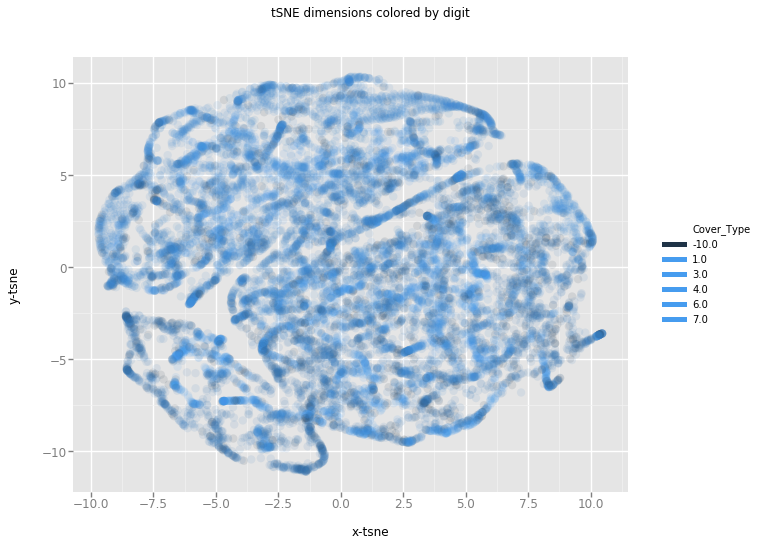

<ggplot: (138848469445)>

In [ ]:
tsne_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0], color)

In [ ]:
umap_visualization(data['train_data'][data['numerical_attributes'] + data['target']], data['target'][0], color)